In [2]:
!pip install seaborn

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

First few rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Missing Values:
age         0
sex         0
bmi         0
c

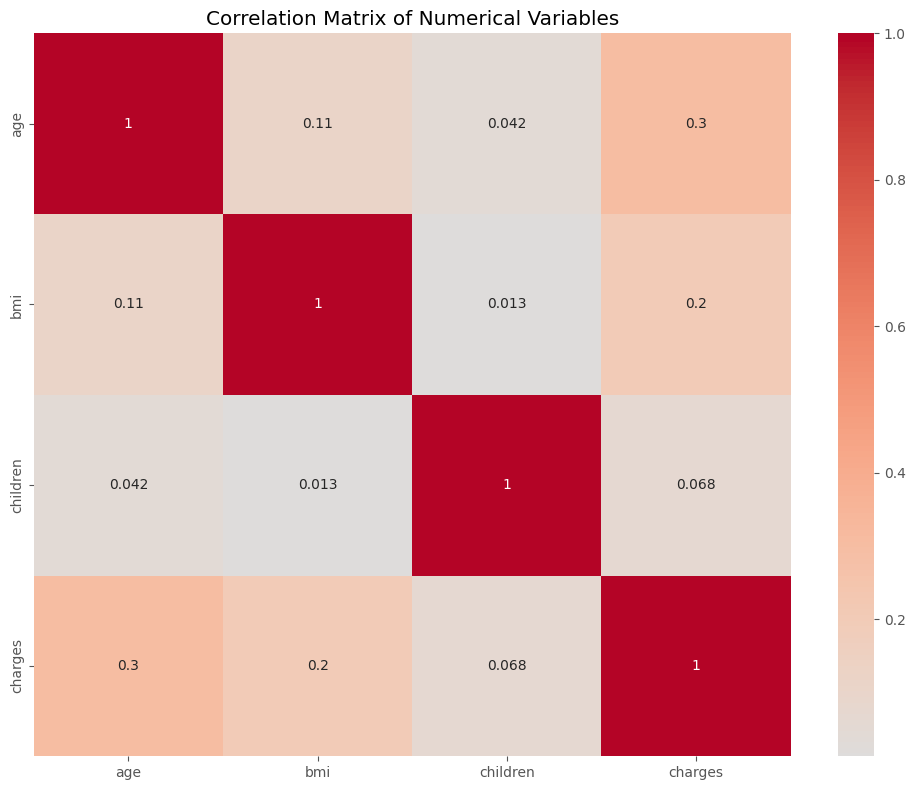

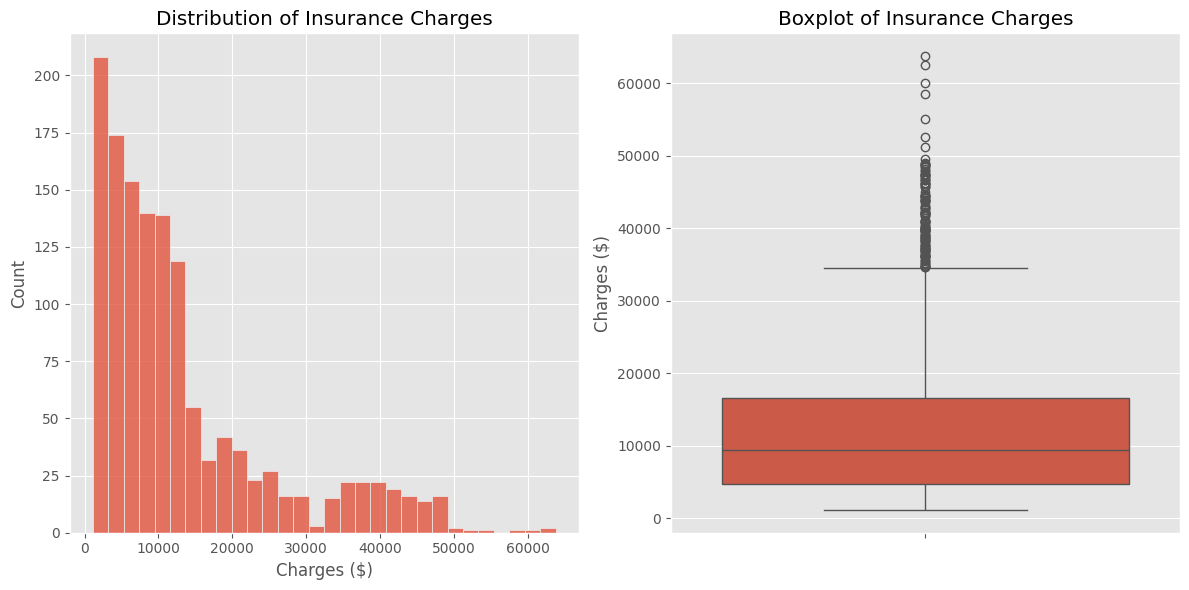

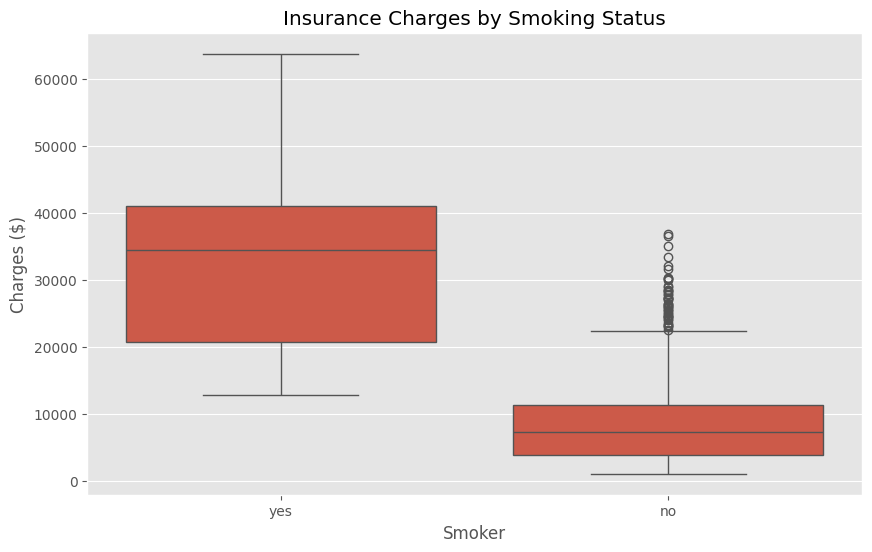

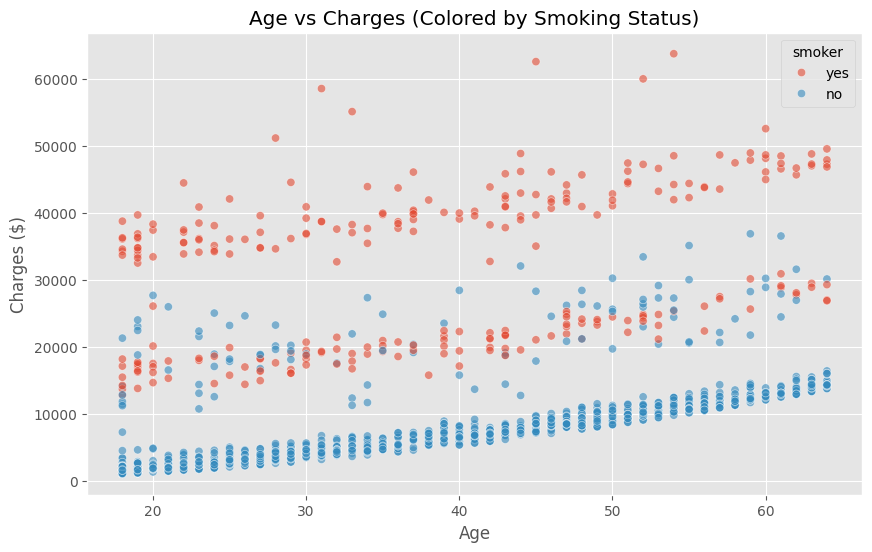

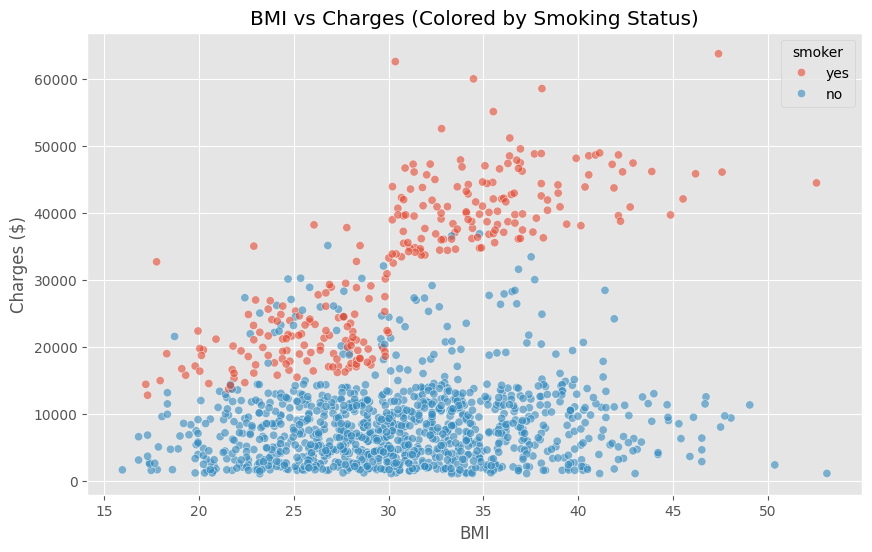

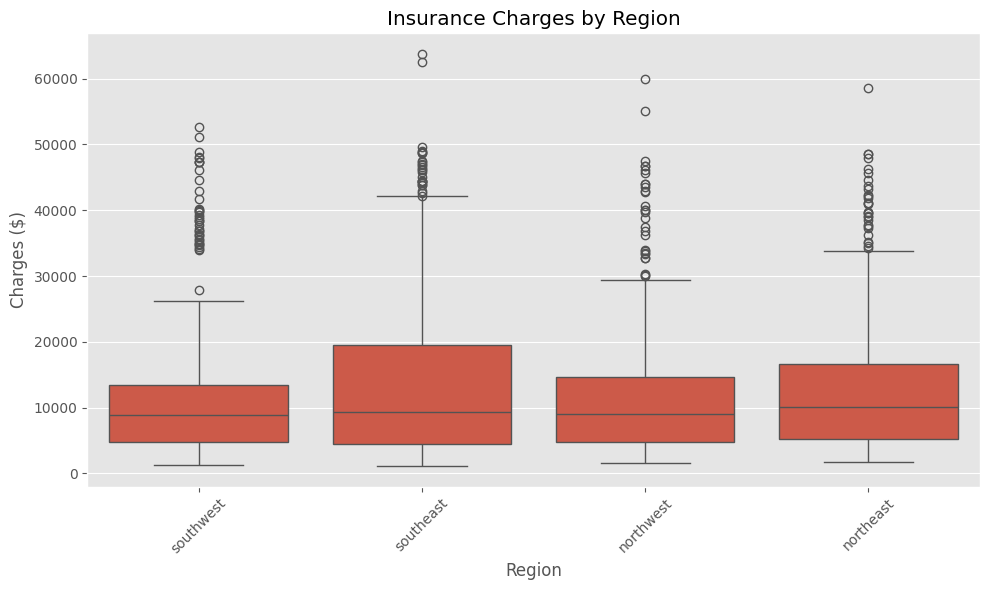

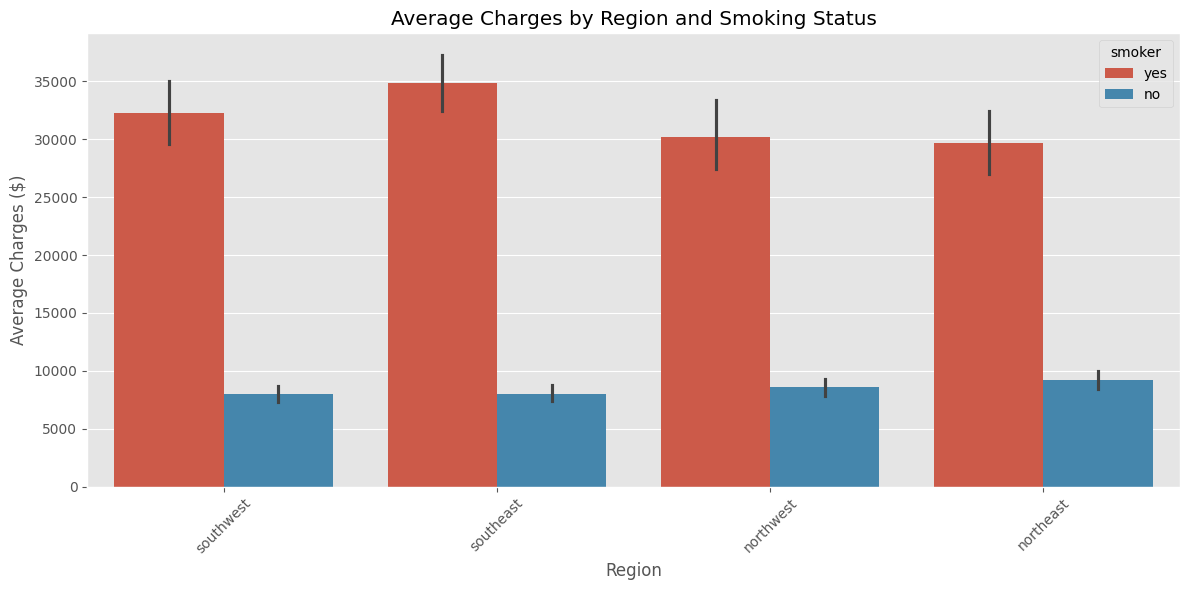


Average Charges by Smoking Status:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Average Charges by Region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Average Charges by Sex:
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

Correlation with Charges:
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

Summary Statistics by Smoking Status:
         count          mean           std         min           25%  \
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                50%           75%          max  
smoker                                          
no       7345.40530  11362.887050  36910.60803

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

df = pd.read_csv('insurance.csv')

print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nNumerical Variables Summary:")
print(df.describe())

if not os.path.exists('figures'):
    os.makedirs('figures')

# 1. Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.savefig('figures/correlation_heatmap.png')
plt.show()

# 2. Distribution of Charges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='charges', bins=30)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='charges')
plt.title('Boxplot of Insurance Charges')
plt.ylabel('Charges ($)')
plt.tight_layout()
plt.savefig('figures/charges_distribution.png')
plt.show()

# 3. Charges by Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Insurance Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges ($)')
plt.savefig('figures/smoking_charges.png')
plt.show()

# 4. Age vs Charges with Smoking Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.6)
plt.title('Age vs Charges (Colored by Smoking Status)')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.savefig('figures/age_charges.png')
plt.show()  # Display the plot

# 5. BMI vs Charges with Smoking Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.6)
plt.title('BMI vs Charges (Colored by Smoking Status)')
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.savefig('figures/bmi_charges.png')
plt.show()

# 6. Regional Distribution of Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges')
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/region_charges.png')
plt.show()

# 7. Average Charges by Region and Smoking Status
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='region', y='charges', hue='smoker')
plt.title('Average Charges by Region and Smoking Status')
plt.xlabel('Region')
plt.ylabel('Average Charges ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/region_smoking_charges.png')
plt.show()

# Calculate and display summary statistics by groups
print("\nAverage Charges by Smoking Status:")
print(df.groupby('smoker')['charges'].mean())

print("\nAverage Charges by Region:")
print(df.groupby('region')['charges'].mean())

print("\nAverage Charges by Sex:")
print(df.groupby('sex')['charges'].mean())

# Additional insights
print("\nCorrelation with Charges:")
correlations = df[['age', 'bmi', 'children', 'charges']].corr()['charges'].sort_values(ascending=False)
print(correlations)

# Summary statistics for different categories
print("\nSummary Statistics by Smoking Status:")
print(df.groupby('smoker')['charges'].describe())

print("\nNumber of people in each region:")
print(df['region'].value_counts())

print("\nNumber of smokers vs non-smokers:")
print(df['smoker'].value_counts())
